# Machstatz Business Solutions assessment

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, rand_score
from sklearn.preprocessing import StandardScaler

#### Extracting the data which was downloaded locally

In [2]:
df = pd.read_excel("C:/Users/snopy/Favorites/Downloads/BMI_Data.xlsx")

In [3]:
df.head()

,Date,Weight in Pounds,BMI,Cholesterol
0,1993-07-01,201.38,85.35058,251.200000
1,1993-07-02,202.39,85.31267,254.653866
2,1993-07-03,188.84,85.13161,244.942237
3,1993-07-04,184.13,85.16573,236.066544
4,1993-07-05,192.51,85.15533,247.436015


In [4]:
#checking if any null values are present into data
df.isnull().sum()

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
dtype: int64

In [5]:
#so There is no null values present inside the data we can proceed futher

#### Performing the EDA visualisation for better understanding of data

In [6]:
pf = ProfileReport(df)

In [7]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Since date is not related with the other columns of data we drop the date column

In [9]:
#dropping the date column
df.drop(columns=["Date"],inplace=True)

In [10]:
df.head()

,Weight in Pounds,BMI,Cholesterol
0,201.38,85.35058,251.200000
1,202.39,85.31267,254.653866
2,188.84,85.13161,244.942237
3,184.13,85.16573,236.066544
4,192.51,85.15533,247.436015


In [11]:
#using dark background for better insights
plt.style.use("dark_background")

<Figure size 720x720 with 0 Axes>

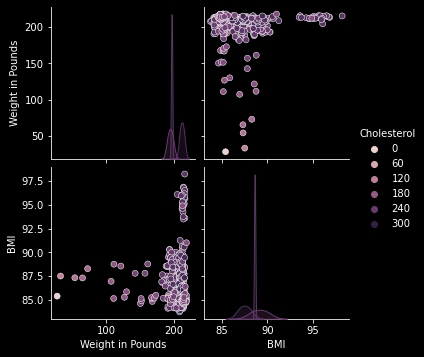

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df,hue='Cholesterol')
plt.show()

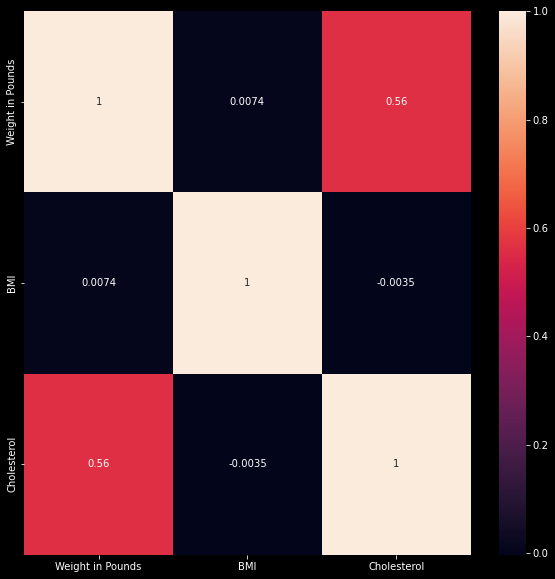

In [13]:
#graphical insight of correlation between the varibales
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
#taking the target variable as y and other columns as x
x = df.drop(columns=['Cholesterol'])
y = df['Cholesterol']

In [15]:
x

,Weight in Pounds,BMI
0,201.38,85.35058
1,202.39,85.31267
2,188.84,85.13161
3,184.13,85.16573
4,192.51,85.15533
...,...,...
756,212.23,84.72916
757,212.65,84.69604
758,214.08,84.79000
759,213.87,85.01045


In [16]:
y

0      251.200000
1      254.653866
2      244.942237
3      236.066544
4      247.436015
          ...    
756    213.445089
757    212.924841
758    216.699800
759    214.869370
760    214.183178
Name: Cholesterol, Length: 761, dtype: float64

In [17]:
#standardizing the data

In [18]:
scalar = StandardScaler()
X = scalar.fit_transform(x)

In [19]:
#importing the  variance inflation factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
#using VIF (variance inflation factor) to detect wheather multicolinerity exists in the data
#creating empty pandas dataframe and passing the vif factors into it

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features'] = x.columns

In [21]:
vif

,VIF,features
0,1.000054,Weight in Pounds
1,1.000054,BMI


In [22]:
#without standardizing or with standardizing the data is giving same result.
#so i am considering the data as it is

In [27]:
#splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Now we have to see we model gives better accuracy in both train and test data

In [25]:
#LinearRegression model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [41]:
linear_ypred = linear_model.predict(x_test)

In [26]:
#importing xgboost algorithm
from xgboost import XGBRegressor

In [28]:
#XGBRegressor model
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
xg_ypred = xg_model.predict(x_test)

In [40]:
#graphical representation for better insight

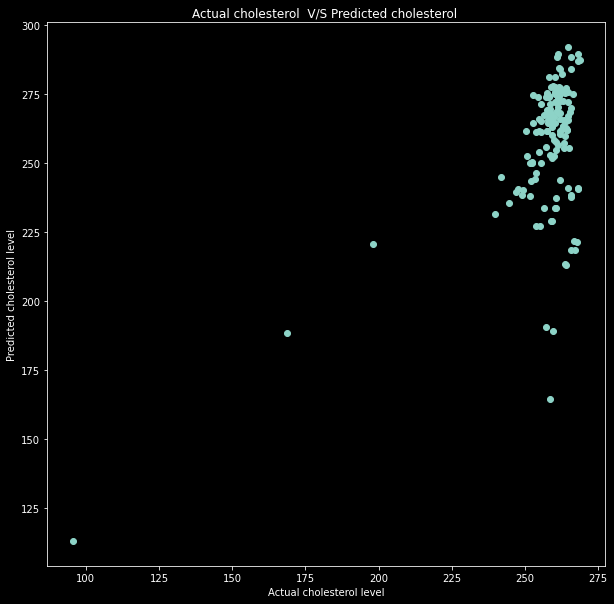

In [46]:
#first we will look into linear 
plt.figure(figsize=(10,10))
plt.scatter(linear_ypred,y_test)
plt.xlabel("Actual cholesterol level")
plt.ylabel("Predicted cholesterol level")
plt.title("Actual cholesterol  V/S Predicted cholesterol ")
plt.show()

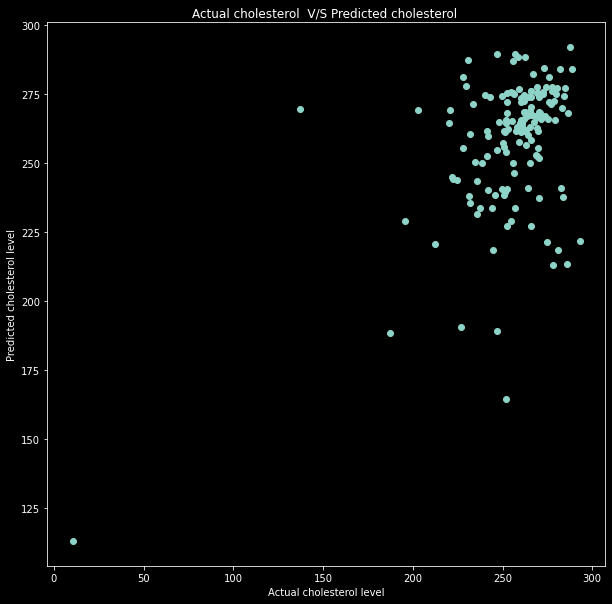

In [45]:
#now xgbregressor model graphical representation
plt.figure(figsize=(10,10))
plt.scatter(xg_ypred,y_test)
plt.xlabel("Actual cholesterol level")
plt.ylabel("Predicted cholesterol level")
plt.title("Actual cholesterol  V/S Predicted cholesterol ")
plt.show()

In [47]:
#since linearRegression is predicted values are closer to actual values 
#we consider LinearRegression model

In [48]:
#now Dumping the model into pickle file so that we can use the model whenever we want

In [49]:
#importing the pickle module
import pickle

In [50]:
encodes = scalar #assigning the StandardScalar to a variable called encodes

In [51]:
model_name = 'Linear_mode.pkl' #dumpimg the model into linear_model.pkl file
encode_name = "Encode.pkl" #dumping the standardization into encode.pkl file

model = open(model_name,'wb')
pickle.dump(linear_model,model)
encode = open(encode_name,'wb')
pickle.dump(encodes,encode)

model.close()
encode.close()

In [52]:
model = open('Linear_mode.pkl','rb')
model = pickle.load(model)

In [53]:
encode = open('encode.pkl','rb')
encode = pickle.load(encode)

In [55]:
X = df.drop(columns=['Cholesterol']) #dropping the target column 

In [56]:
X_encode = encode.transform(X) #transforming the data into standardization

In [57]:
predict = model.predict(X_encode) #predicting the model

In [67]:
predict[89] #here 89 is the index of the data, which is present in 89th row

265.4959073810302

In [66]:
df.iloc[89]

Weight in Pounds    214.400000
BMI                  86.212710
Cholesterol         265.090299
Name: 89, dtype: float64

In [75]:
#since the predicted values and actual value does not have much difference.
#we can conclude that our model is giving better results insight

For predicting cholesterol level of animal just pass  'Weight of animal and forecasted BMI' data in model.predict 
or just put the index of the data to predict